<a href="https://colab.research.google.com/github/SXRXSHARK/Valentines/blob/main/mumax3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mumax3 in google colaboratory**

# About Google colaboratory

Google colaboratory is a research tool mainly used by researchers in the field of machine learning. The main purpose of this tool is to run python code in jupyter notebooks. These notebooks run on a virtual linux machine private to your gmail account. This means that you will need a gmail account to execute programs in a google colaboratory session. If you have a gmail account you should be able to copy this jupyter notebook to your google drive and execute the code cells.

To run mumax3 simulations, you do not need to write any python code. So you might wonder how we can use this jupyter notebook environment to run mumax3 simulations. The trick here is that you can execute shell commands by typing an exclamation mark followed by the command, as shown in the code cell below. If you run this code cell, the shell will print out the operating system of the virtual machine. Having the ability to run shell commands suffices to install and run mumax3 simulations, as demonstrated in the sections below.

In [ ]:
! echo "This machine runs" $(uname)

# Installing mumax3

To install mumax3.10 on this virtual machine, you can run the cell below. This might take a few minutes. When the installation is done, you can collapse this section to get a clean workspace.

In [ ]:
# Download the mumax3 binary
!wget https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
!tar -xvf mumax3.10_linux_cuda10.1.tar.gz
!rm mumax3.10_linux_cuda10.1.tar.gz
!rm -rf mumax3.10 && mv mumax3.10_linux_cuda10.1 mumax3.10

#update the PATH environment variable
import os
os.environ['PATH'] += ":/content/mumax3.10"

# Download an examplary script
!wget https://raw.githubusercontent.com/JeroenMulkers/mumax3-tutorial/master/standardproblem4.mx3 -O standardproblem4.mx3

# Running a mumax3 script

You can open the filebrowser for this virtual machine on the left side of this page. Here you should see a mumax3 script named standardproblem4.mx3. You should be able to open this file with a double click. To execute the script run the code cell below.

In [29]:
!mumax3 standardproblem4.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla T4(15095MB), CUDA Driver 12.4, cc=7.5, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: standardproblem4.out/
//starting GUI at http://127.0.0.1:35367
setGridsize(128, 32, 1)
setCellsize(2e-9, 2e-9, 1e-9)
setPBC(0, 0, 0)
//resizing...
// Initializing geometry 3 %
// Initializing geometry 100 %
Msat = 580e3
Aex = 15e-12
Dind = 3.0e-3
Ku1 = 0.8e6
anisU = vector(0, 0, 1)
alpha = 0.3
m = uniform(0, 0, 1)
defRegion(1, circle(10e-9).transl(64e-9, 16e-9, 0))
J = vector(0, 0, 0)
Pol = 0.4
xi = 0.0
J.setRegion(1, vector(0, 0, -9e12

If you ran the cell above, then there should be a directory named standardproblem4.out (you might need to click on the refresh button in the filebrowser). This directory contains the output files of the simulation. mumax3-convert can now be used to convert the ovf files to images, as demonstrated in the cell below.

In [31]:
!mumax3-convert -png standardproblem4.out/*.ovf

standardproblem4.out/m000000.ovf
standardproblem4.out/m000001.ovf
standardproblem4.out/m000002.ovf
standardproblem4.out/m000003.ovf
standardproblem4.out/m000004.ovf
standardproblem4.out/m000005.ovf
standardproblem4.out/m000006.ovf
[skip] standardproblem4.out/m000000.ovf	-> standardproblem4.out/m000000.png: skipped based on time stamps
[skip] standardproblem4.out/m000001.ovf	-> standardproblem4.out/m000001.png: skipped based on time stamps
[skip] standardproblem4.out/m000002.ovf	-> standardproblem4.out/m000002.png: skipped based on time stamps
[skip] standardproblem4.out/m000003.ovf	-> standardproblem4.out/m000003.png: skipped based on time stamps
[skip] standardproblem4.out/m000004.ovf	-> standardproblem4.out/m000004.png: skipped based on time stamps
[skip] standardproblem4.out/m000005.ovf	-> standardproblem4.out/m000005.png: skipped based on time stamps
[skip] standardproblem4.out/m000006.ovf	-> standardproblem4.out/m000006.png: skipped based on time stamps
0 files converted,  7 skipp

Now it's up to you. Right click on the filebrowser to add a new file. Open the file and write your first mumax3 script. Run this script as demonstrated above.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'table.txt' with your MuMax3 table filename
filename = 'table.txt'

# Load the MuMax3 table file (space or tab-separated)
df = pd.read_csv('standardproblem4.out/table.txt', delim_whitespace=True)

# Save as Excel file
excel_filename = 'table.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Converted '{filename}' to '{excel_filename}'")


Converted 'table.txt' to 'table.xlsx'


/tmp/ipython-input-39-4226120469.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('standardproblem4.out/table.txt', delim_whitespace=True)


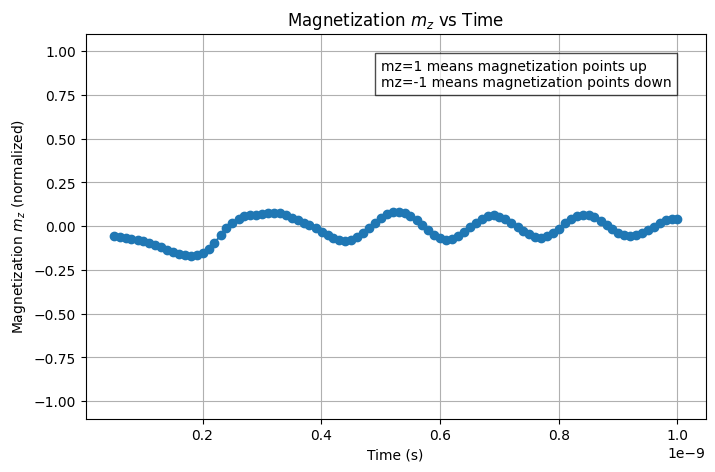

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
filename = 'table.txt'
# Load the MuMax3 table file, skipping initial lines and providing column names
# Assuming the first column is time and the third column is 'mz ()' based on MuMax3 output format
df = pd.read_csv('standardproblem4.out/table.txt', skiprows=6, sep='\t', names=['t (s)', 'mx ()', 'my ()', 'mz ()', 'm_x ()', 'm_y ()', 'm_z ()', 'ext_bubblepos ()', 'ext_bubblepos (m)'])


# For example: plot mz (magnetization z-component) vs time
plt.figure(figsize=(8,5))
plt.plot(df['t (s)'], df['mz ()'], marker='o', linestyle='-')

plt.xlabel('Time (s)')
plt.ylabel('Magnetization $m_z$ (normalized)')
plt.title('Magnetization $m_z$ vs Time')
plt.ylim(-1.1, 1.1)  # limits for clarity
plt.grid(True)

# Add explanation text on plot
plt.text(0.5*df['t (s)'].max(), 0.8,
         'mz=1 means magnetization points up\nmz=-1 means magnetization points down',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.savefig('magnetization_z_vs_time.png')
plt.show()

In [106]:
# Save the mumax3 script to a file
script_content = """
// Inputs A=0, B=0
Msat = 580e3
Aex = 15e-12
Dind = 3.0e-3
Ku1 = 0.7e6
anisU = vector(0, 0, 1)
alpha = 0.3

SetGridSize(16, 16, 1)
SetCellSize(2e-9, 2e-9, 1e-9)
setPBC(0, 0, 0)
defRegion(1, Rect(32e-9, 32e-9))

m = uniform(0, 0, -1)

Pol = 0.4
xi = 0.0

J.setRegion(1, vector(0, 0, 0))
tableAutosave(1e-9)

Run(5e-9)

tableSave()
autosave(m, 5e-9)
"""

with open("tunnel_barrier.mx3", "w") as f:
    f.write(script_content)


In [104]:
# Execute the mumax3 script again
!mumax3 tunnel_barrier.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla T4(15095MB), CUDA Driver 12.4, cc=7.5, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: tunnel_barrier.out/
//starting GUI at http://127.0.0.1:35367
Msat = 580e3
Aex = 15e-12
Dind = 3.0e-3
Ku1 = 0.7e6
anisU = vector(0, 0, 1)
alpha = 0.3
SetGridSize(16, 16, 1)
SetCellSize(2e-9, 2e-9, 1e-9)
setPBC(0, 0, 0)
//resizing...
// Initializing geometry 6 %
// Initializing geometry 100 %
defRegion(1, Rect(32e-9, 32e-9))
m = uniform(0, 0, -1)
Pol = 0.4
xi = 0.0
J.setRegion(1, vector(0, 0, 0))
tableAutosave(5e-9)
Run(5e-9)
//Using cach

In [105]:
!mumax3-convert -png tunner_barrier.out/*.ovf

tunner_barrier.out/*.ovf
0 files converted,  0 skipped,  0 failed


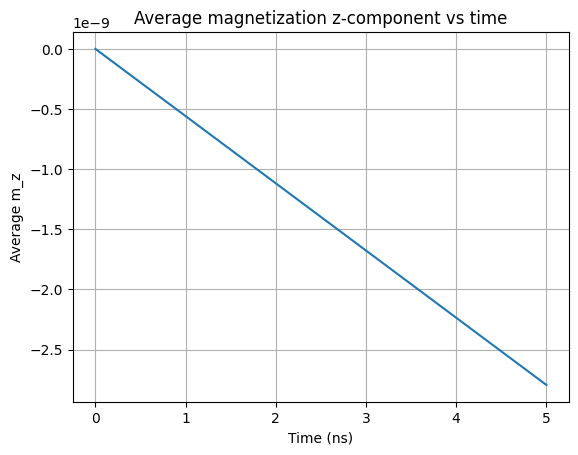

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Load Mumax3 table data (skip header lines starting with #)
data = np.loadtxt('tunnel_barrier.out/table.txt', comments='#')

time = data[:,0]   # first column is time (s)
mz = data[:,1]     # second column is average(mz)

plt.plot(time * 1e9, mz)  # time in ns
plt.xlabel('Time (ns)')
plt.ylabel('Average m_z')
plt.title('Average magnetization z-component vs time')
plt.grid(True)
plt.show()


In [108]:
# Save the mumax3 script to a file
script_content = """

// MuMax3 script: Skyrmion detection in MTJ readout
// Basic example with skyrmion initialization and detection

// Parameters
Msat = 580e3            // Saturation magnetization (A/m)
Aex = 15e-12            // Exchange stiffness (J/m)
alpha = 0.3             // Gilbert damping
Ku1 = 0.7e6             // Uniaxial anisotropy constant
anisU = vector(0, 0, 1) // Anisotropy axis (out-of-plane)

// Grid and cell size
Nx := 128
Ny := 128
Nz := 1
SetGridSize(Nx, Ny, Nz)
SetCellSize(1e-9, 1e-9, 1e-9)

// Skyrmion radius (approx)
r_sk := 20e-9

// Initialize skyrmion magnetization profile
m = uniform(0, 0, 1) // Start with uniform up

for x := 0; x < Nx; x++ {
    for y := 0; y < Ny; y++ {
        dx := float64(x - Nx/2) * CellSizeX
        dy := float64(y - Ny/2) * CellSizeY
        r := sqrt(dx*dx + dy*dy)
        if r < r_sk {
            theta := pi * (r / r_sk) // theta varies from 0 to pi over radius
            phi := atan2(dy, dx)
            mx := sin(theta) * cos(phi)
            my := sin(theta) * sin(phi)
            mz := cos(theta)
            m.set(x, y, 0, vector(float32(mx), float32(my), float32(mz)))
        }
    }
}

// Relax to stable state
Minimize()

// Table outputs
tableAdd(time)
tableAdd(average(m).z)       // average magnetization z component
tableAdd(SkyrmionNumber())   // topological charge for skyrmion detection

tableAutosave(1e-9)          // save table every 1 ns

// Run simulation for 10 ns (readout process)
Run(10e-9)
"""
with open("read.mx3", "w") as f:
    f.write(script_content)



In [109]:
!mumax3 read.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla T4(15095MB), CUDA Driver 12.4, cc=7.5, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: read.out/
/home/jmulkers/GO/src/github.com/mumax/3/cmd/mumax3/main.go:110 script line 28: dx := float64(x - Nx/2) * CellSizeX: undefined: float64
